In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('historyprice.csv', parse_dates=True, index_col='Date')

In [27]:
df.head()

,Prev Close,OPEN,HIGH,LOW,Last Price,close,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,
2020-12-17,2814.20,2811.00,2853.70,2805.00,2848.70,2838.20,2823.94,2863460,8.086237e+09,121983,1423130,49.7
2020-12-18,2838.20,2868.00,2898.00,2846.20,2851.95,2861.00,2873.74,6076692,1.746284e+10,178840,2436219,40.09
2020-12-21,2861.00,2861.00,2886.50,2785.00,2810.00,2820.15,2853.21,2705195,7.718476e+09,141821,887083,32.79
2020-12-22,2820.15,2834.00,2883.65,2818.65,2870.65,2872.50,2848.13,2881737,8.207569e+09,158517,1123581,38.99
2020-12-23,2872.50,2876.05,2919.00,2865.45,2907.15,2908.75,2904.67,2790988,8.106912e+09,125341,947547,33.95


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 496 entries, 2020-12-17 to 2022-12-07
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Prev Close              496 non-null    float64
 1   OPEN                    496 non-null    float64
 2   HIGH                    496 non-null    float64
 3   LOW                     496 non-null    float64
 4   Last Price              496 non-null    float64
 5   close                   496 non-null    float64
 6   Average Price           496 non-null    float64
 7   Total Traded Quantity   496 non-null    int64  
 8   Turnover                496 non-null    float64
 9   No. of Trades           496 non-null    int64  
 10  Deliverable Qty         496 non-null    object 
 11  % Dly Qt to Traded Qty  496 non-null    object 
dtypes: float64(8), int64(2), object(2)
memory usage: 50.4+ KB


<AxesSubplot:xlabel='Date'>

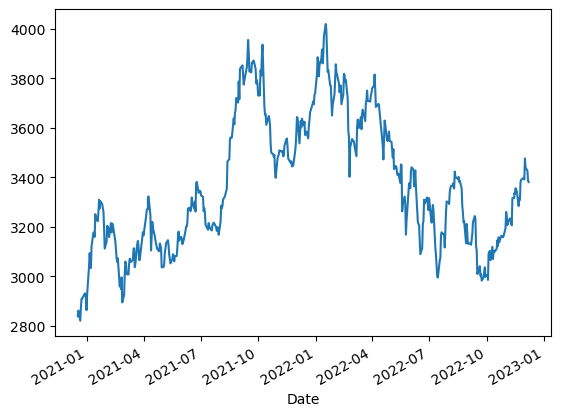

In [29]:
df['close'].plot()

In [30]:
len(df)

496

In [31]:
tcs_close = df['close']

In [32]:
tcs_close.reset_index(drop=True,inplace=True)
tcs_close.shape

(496,)

In [33]:
tcs_close = pd.DataFrame(tcs_close)
tcs_close.head()

,close
0,2838.20
1,2861.00
2,2820.15
3,2872.50
4,2908.75


In [34]:
train = tcs_close.iloc[:480]
test = tcs_close.iloc[480:]

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()

In [37]:
scaler.fit(train)

MinMaxScaler()

In [38]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [39]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

## Creating the Model

In [40]:
test.shape

(16, 1)

In [41]:
help(TimeseriesGenerator)

Help on class TimeseriesGenerator in module keras.preprocessing.sequence:

class TimeseriesGenerator(keras.utils.data_utils.Sequence)
 |  TimeseriesGenerator(data, targets, length, sampling_rate=1, stride=1, start_index=0, end_index=None, shuffle=False, reverse=False, batch_size=128)
 |  
 |  Utility class for generating batches of temporal data.
 |  
 |  Deprecated: `tf.keras.preprocessing.sequence.TimeseriesGenerator` does not
 |  operate on tensors and is not recommended for new code. Prefer using a
 |  `tf.data.Dataset` which provides a more efficient and flexible mechanism for
 |  batching, shuffling, and windowing input. See the
 |  [tf.data guide](https://www.tensorflow.org/guide/data) for more details.
 |  
 |  This class takes in a sequence of data-points gathered at
 |  equal intervals, along with time series parameters such as
 |  stride, length of history, etc., to produce batches for
 |  training/validation.
 |  
 |  Arguments:
 |      data: Indexable generator (such as li

In [43]:
length = 16
batch_size = 32
generator = TimeseriesGenerator(scaled_train, scaled_train, length = length, batch_size=batch_size)
# Will create an object with train - length and last 16 values will be predicted and validated

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout

In [45]:
n_features = 1

In [47]:
model = Sequential()

model.add(SimpleRNN(30, input_shape=(length, n_features)))
model.add(Dropout(rate=0.2))
#fully connected layer occupies most of the parameters and hence neurons develop co-dependency amongst each other
#during training which curbs the individual power of each neuron leading to over-fitting of training data.
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
            

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 30)                960       
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 991
Trainable params: 991
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.fit_generator(generator, epochs=10, shuffle=False)

Epoch 1/10


C:\Users\vijai\AppData\Local\Temp\ipykernel_6924\902690755.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs=10, shuffle=False)


15/15 [==============================] - 2s 5ms/step - loss: 0.0737
Epoch 2/10
15/15 [==============================] - 0s 6ms/step - loss: 0.0331
Epoch 3/10
15/15 [==============================] - 0s 6ms/step - loss: 0.0171
Epoch 4/10
15/15 [==============================] - 0s 6ms/step - loss: 0.0155
Epoch 5/10
15/15 [==============================] - 0s 6ms/step - loss: 0.0150
Epoch 6/10
15/15 [==============================] - 0s 5ms/step - loss: 0.0130
Epoch 7/10
15/15 [==============================] - 0s 6ms/step - loss: 0.0111
Epoch 8/10
15/15 [==============================] - 0s 7ms/step - loss: 0.0113
Epoch 9/10
15/15 [==============================] - 0s 6ms/step - loss: 0.0102
Epoch 10/10
15/15 [==============================] - 0s 6ms/step - loss: 0.0087


In [50]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

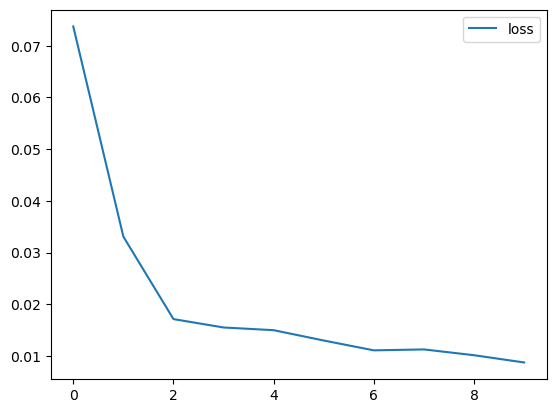

In [51]:
losses.plot()

In [52]:
## Evaluate test set

In [53]:
first_eval_batch = scaled_train[-length:] # picks last 16 values in train set

In [54]:
first_eval_batch

array([[0.28486239],
       [0.285196  ],
       [0.28127606],
       [0.28615513],
       [0.31109258],
       [0.36659716],
       [0.35158465],
       [0.32243536],
       [0.33131776],
       [0.34491243],
       [0.33019183],
       [0.32151793],
       [0.41351126],
       [0.41351126],
       [0.42981651],
       [0.42739783]])

In [55]:
first_eval_batch = first_eval_batch.reshape((1, length, 1))

In [56]:
first_eval_batch

array([[[0.28486239],
        [0.285196  ],
        [0.28127606],
        [0.28615513],
        [0.31109258],
        [0.36659716],
        [0.35158465],
        [0.32243536],
        [0.33131776],
        [0.34491243],
        [0.33019183],
        [0.32151793],
        [0.41351126],
        [0.41351126],
        [0.42981651],
        [0.42739783]]])

In [57]:
model.predict(first_eval_batch) #first prediction after train set which is first value of test

1/1 [==============================] - 0s 296ms/step


array([[0.46027094]], dtype=float32)

In [58]:
scaled_test[0]

array([0.44637198])

In [59]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
    # Get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    #store prediction
    test_predictions.append(current_pred)
    
    #update batch to include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
                                

1/1 [==============================] - 0s 28ms/step


In [60]:
test_predictions

[array([0.46027094], dtype=float32),
 array([0.47151265], dtype=float32),
 array([0.47591543], dtype=float32),
 array([0.48098075], dtype=float32),
 array([0.49395478], dtype=float32),
 array([0.49934128], dtype=float32),
 array([0.4939557], dtype=float32),
 array([0.50324637], dtype=float32),
 array([0.5129362], dtype=float32),
 array([0.52506983], dtype=float32),
 array([0.52572787], dtype=float32),
 array([0.5207634], dtype=float32),
 array([0.53942525], dtype=float32),
 array([0.546217], dtype=float32),
 array([0.5544014], dtype=float32),
 array([0.55336225], dtype=float32)]

In [61]:
true_predictions = scaler.inverse_transform(test_predictions)

In [62]:
true_predictions

array([[3372.01485857],
       [3385.49366193],
       [3390.77260294],
       [3396.84592392],
       [3412.40177848],
       [3418.86019384],
       [3412.40288621],
       [3423.54239401],
       [3435.16047367],
       [3449.70872953],
       [3450.49771383],
       [3444.54531326],
       [3466.92087939],
       [3475.06421217],
       [3484.87727585],
       [3483.63133814]])

In [63]:
test['predictions'] = true_predictions

C:\Users\vijai\AppData\Local\Temp\ipykernel_6924\349349345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = true_predictions


In [64]:
test

,close,predictions
480,3355.35,3372.014859
481,3349.00,3385.493662
482,3343.45,3390.772603
483,3283.50,3396.845924
484,3314.95,3412.401778
485,3308.30,3418.860194
486,3380.15,3412.402886
487,3389.65,3423.542394
488,3395.25,3435.160474
489,3397.35,3449.708730


<AxesSubplot:>

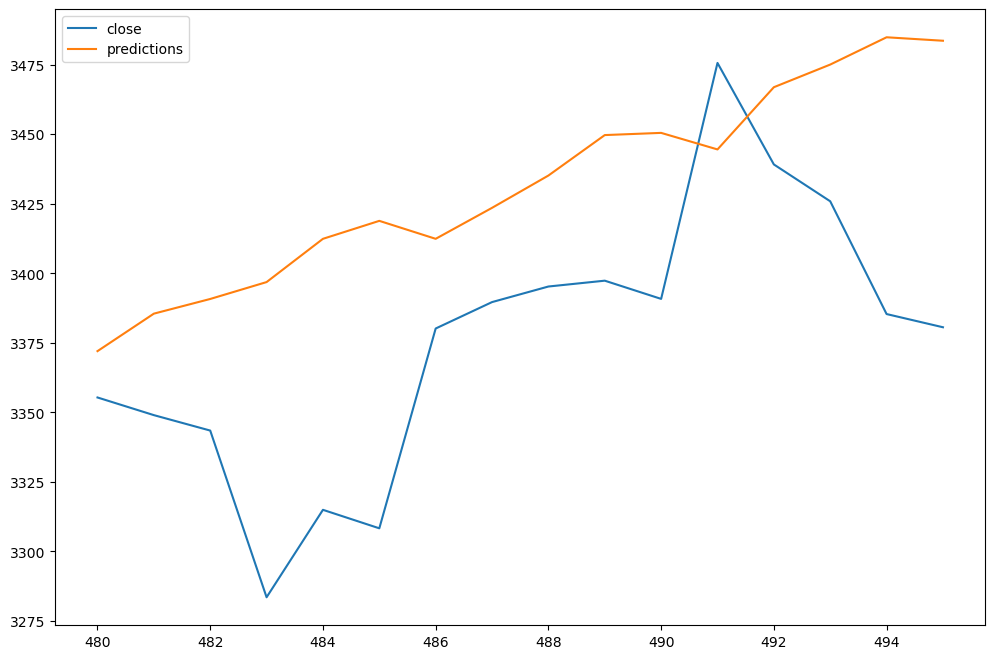

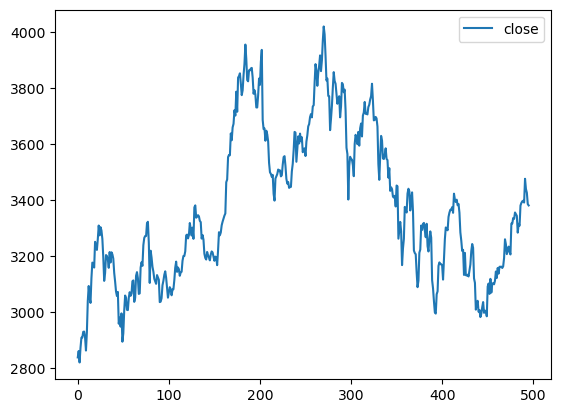

In [65]:
test.plot(figsize=(12,8))
tcs_close.plot()

## Let us create Full Model

In [67]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(tcs_close)

In [68]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size=32)

In [70]:
model = Sequential()

model.add(SimpleRNN(30,input_shape=(length,n_features)))
model.add(Dropout(rate=0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [71]:
model.fit_generator(generator, epochs=10, shuffle=False)

Epoch 1/10


C:\Users\vijai\AppData\Local\Temp\ipykernel_6924\902690755.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs=10, shuffle=False)


15/15 [==============================] - 2s 5ms/step - loss: 0.1026
Epoch 2/10
15/15 [==============================] - 0s 6ms/step - loss: 0.0455
Epoch 3/10
15/15 [==============================] - 0s 6ms/step - loss: 0.0204
Epoch 4/10
15/15 [==============================] - 0s 6ms/step - loss: 0.0122
Epoch 5/10
15/15 [==============================] - 0s 5ms/step - loss: 0.0113
Epoch 6/10
15/15 [==============================] - 0s 5ms/step - loss: 0.0093
Epoch 7/10
15/15 [==============================] - 0s 5ms/step - loss: 0.0091
Epoch 8/10
15/15 [==============================] - 0s 6ms/step - loss: 0.0090
Epoch 9/10
15/15 [==============================] - 0s 6ms/step - loss: 0.0095
Epoch 10/10
15/15 [==============================] - 0s 6ms/step - loss: 0.0085


<AxesSubplot:>

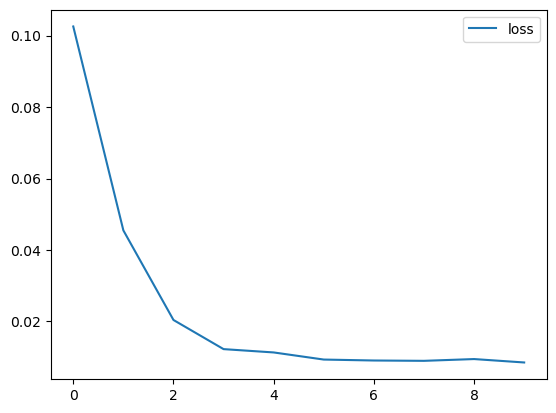

In [72]:
full_model_losses = pd.DataFrame(model.history.history)
full_model_losses.plot()

In [73]:
forecast = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(20):
    #get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    #store prediction
    forecast.append(current_pred)
    
    #update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 32ms/step


In [74]:
forecast = scaler.inverse_transform(forecast)

In [75]:
forecast

array([[3338.74412679],
       [3333.71367296],
       [3381.38626256],
       [3378.53159016],
       [3380.71194541],
       [3364.00891911],
       [3395.23436632],
       [3386.22050657],
       [3400.15015301],
       [3400.32270759],
       [3423.87285265],
       [3396.13465887],
       [3433.52904853],
       [3417.26325103],
       [3438.61249437],
       [3429.11774012],
       [3458.35203823],
       [3437.16752394],
       [3464.8124189 ],
       [3449.1791667 ]])

In [76]:
forecast.flatten()

array([3338.74412679, 3333.71367296, 3381.38626256, 3378.53159016,
       3380.71194541, 3364.00891911, 3395.23436632, 3386.22050657,
       3400.15015301, 3400.32270759, 3423.87285265, 3396.13465887,
       3433.52904853, 3417.26325103, 3438.61249437, 3429.11774012,
       3458.35203823, 3437.16752394, 3464.8124189 , 3449.1791667 ])

In [77]:
df_array = np.array(tcs_close)
df_array

array([[2838.2 ],
       [2861.  ],
       [2820.15],
       [2872.5 ],
       [2908.75],
       [2909.35],
       [2929.4 ],
       [2930.5 ],
       [2909.3 ],
       [2862.75],
       [2928.25],
       [3039.45],
       [3093.  ],
       [3051.5 ],
       [3032.8 ],
       [3120.9 ],
       [3176.45],
       [3174.85],
       [3158.95],
       [3250.7 ],
       [3233.35],
       [3221.75],
       [3260.7 ],
       [3308.8 ],
       [3273.85],
       [3303.1 ],
       [3291.3 ],
       [3261.05],
       [3196.55],
       [3111.35],
       [3139.35],
       [3203.45],
       [3200.05],
       [3188.45],
       [3157.95],
       [3214.1 ],
       [3176.9 ],
       [3213.3 ],
       [3206.  ],
       [3190.8 ],
       [3139.85],
       [3108.8 ],
       [3073.1 ],
       [3057.35],
       [3071.85],
       [2958.45],
       [2980.2 ],
       [2948.1 ],
       [2995.3 ],
       [2894.3 ],
       [2924.2 ],
       [3006.35],
       [3059.1 ],
       [3049.7 ],
       [3008.05],
       [30

In [78]:
full_data = pd.DataFrame(np.concatenate((df_array.flatten(), forecast.flatten())))

<AxesSubplot:>

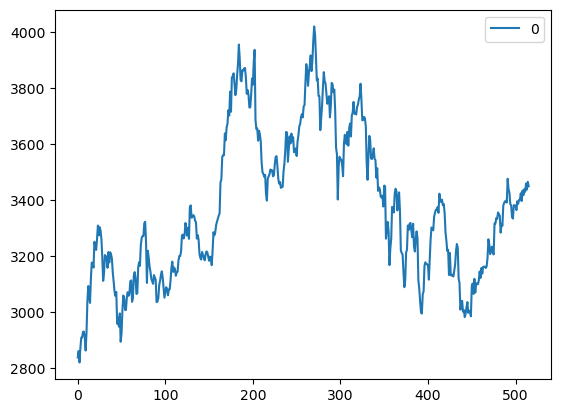

In [79]:
full_data.plot()

## LSTM Model

In [81]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [82]:
length

16

In [83]:
scaled_test.shape

(16, 1)

In [84]:
length = 15
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=32)

validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=length, batch_size=32)

In [85]:
model = Sequential()

model.add(LSTM(30,input_shape=(length,n_features)))
model.add(Dropout(rate=0.2))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [86]:
model.fit_generator(generator,epochs=20,validation_data=validation_generator,callbacks=[early_stop],shuffle=False)

Epoch 1/20


C:\Users\vijai\AppData\Local\Temp\ipykernel_6924\2777817136.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=20,validation_data=validation_generator,callbacks=[early_stop],shuffle=False)


15/15 [==============================] - 4s 57ms/step - loss: 0.1231 - val_loss: 0.0164
Epoch 2/20
15/15 [==============================] - 0s 13ms/step - loss: 0.0188 - val_loss: 0.0102
Epoch 3/20
15/15 [==============================] - 0s 12ms/step - loss: 0.0162 - val_loss: 5.0914e-05
Epoch 4/20
15/15 [==============================] - 0s 13ms/step - loss: 0.0152 - val_loss: 9.8525e-05
Epoch 5/20
15/15 [==============================] - 0s 13ms/step - loss: 0.0114 - val_loss: 0.0010


<AxesSubplot:>

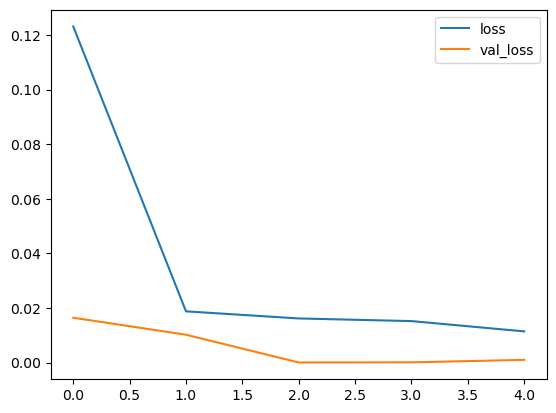

In [87]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [88]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
    # Get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    #store prediction
    test_predictions.append(current_pred)
    
    #update batch to include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 27ms/step


C:\Users\vijai\AppData\Local\Temp\ipykernel_6924\1875609471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LSTM_predictions'] = true_predictions


<AxesSubplot:>

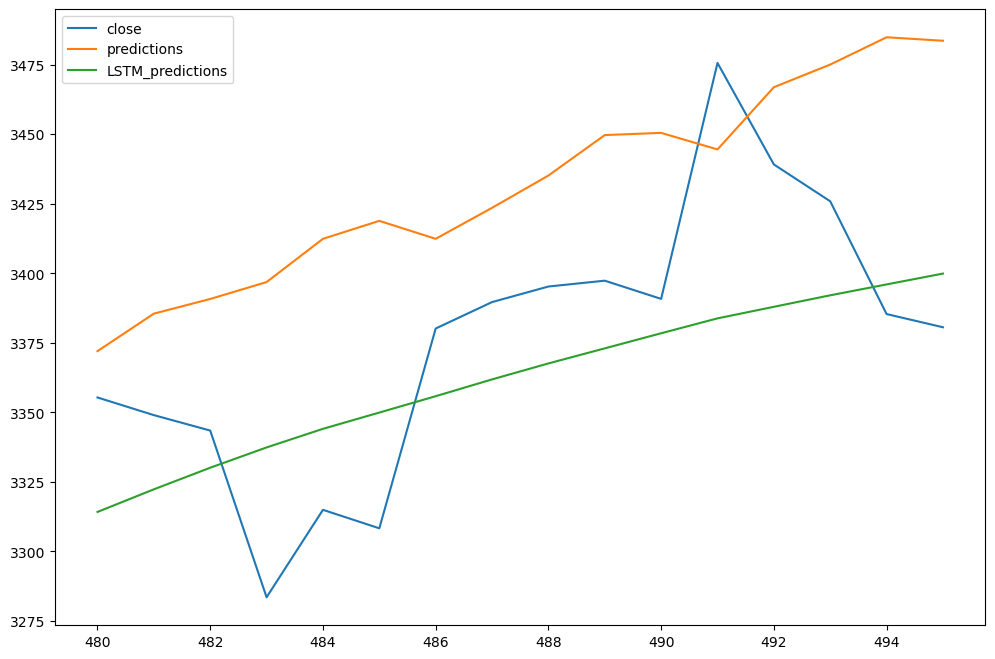

In [89]:
true_predictions = scaler.inverse_transform(test_predictions)
test['LSTM_predictions'] = true_predictions
test.plot(figsize=(12,8))

In [90]:
forecast = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(15):
    #get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    #store prediction
    forecast.append(current_pred)
    
    #update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 28ms/step


In [91]:
forecast = scaler.inverse_transform(forecast)

In [92]:
full_data = pd.DataFrame(np.concatenate((df_array.flatten(), forecast.flatten())))

<AxesSubplot:>

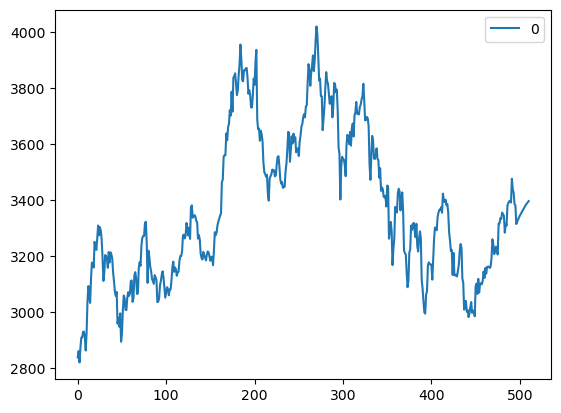

In [93]:
full_data.plot()

In [94]:
forecast

array([[3314.19042086],
       [3322.31717353],
       [3330.08709663],
       [3337.38241422],
       [3344.07359424],
       [3349.92365553],
       [3355.80634105],
       [3361.84800261],
       [3367.59140095],
       [3373.01012939],
       [3378.4417217 ],
       [3383.79641663],
       [3387.95355632],
       [3392.09029248],
       [3396.00251829]])

In [95]:
full_data.tail(30)

,0
481,3349.000000
482,3343.450000
483,3283.500000
484,3314.950000
485,3308.300000
486,3380.150000
487,3389.650000
488,3395.250000
489,3397.350000
490,3390.800000


## FB Prophet model

In [96]:
df.reset_index(inplace=True)

In [97]:
data = df[['Date','close']]

In [98]:
data.head()

,Date,close
0,2020-12-17,2838.20
1,2020-12-18,2861.00
2,2020-12-21,2820.15
3,2020-12-22,2872.50
4,2020-12-23,2908.75


In [ ]:
from fbprophet import Prophet
m = Prophet(changepoint_prior_scale=0.15, daily_seasonality = True) # The prophet class model
m.fit(data) # fit the model using all data

In [ ]:
future = m.make_future_dataframe(periods=21) # We need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the Google Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

In [ ]:
m.plot_components(prediction)
plt.show()